<a href="https://colab.research.google.com/github/Rtniewi/cwiertniewicz-DataScience/blob/main/HW6/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//*** Katrina Cwiertniewicz
//*** Introduction to Data Science IS1
//***10/8/2025
//*** Project 6: Problem 1 Python
###The purpose of this assignment is to perform data analysis on the adult_training dataset in Python

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [ ]:
#Adult training data set
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

Instead of having only two predictors, all variables will be considered for classifciation with the exception of income. Income will still be used as the target.

Income: The Target

/tmp/ipython-input-3206165226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=adultDF, palette = 'hls')


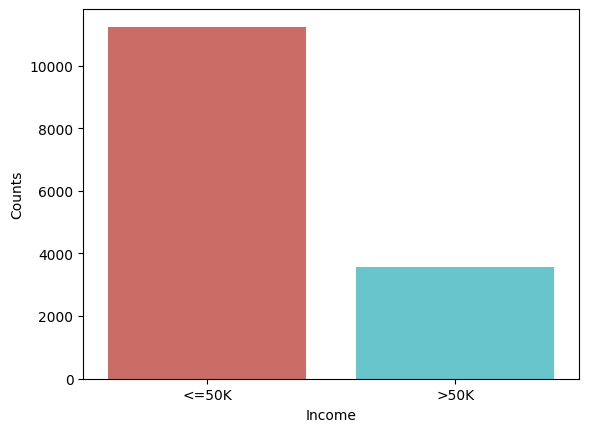

In [ ]:
sns.countplot(x='income', data=adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

Prepare Training Data

In [ ]:
# Encoding the categoric columns

le = preprocessing.LabelEncoder()

# Save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode only the categoric or boolean attributes (workclass, martial-status, occupation, sex)
for i in range(0, adultDF.shape[1]):
    if adultDF.dtypes[i]=='object' or adultDF.dtypes[i]=='bool':
        encoded_adultDF[adultDF.columns[i]] = le.fit_transform(adultDF[adultDF.columns[i]])
    else:
        encoded_adultDF[adultDF.columns[i]] = adultDF[adultDF.columns[i]]

encoded_adultDF.head(10)


/tmp/ipython-input-3253698244.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adultDF.dtypes[i]=='object' or adultDF.dtypes[i]=='bool':
/tmp/ipython-input-3253698244.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adultDF.dtypes[i]=='object' or adultDF.dtypes[i]=='bool':
/tmp/ipython-input-3253698244.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adultDF.dtypes[i]=='object' or adultDF.dtypes[i]=='bool':
/tmp

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,6,13,2,4,1,0,0,0
1,38,4,9,0,6,1,0,0,0
2,49,4,5,3,8,0,0,0,0
3,52,6,9,2,4,1,0,0,1
4,31,4,14,4,10,0,14084,0,1
5,40,4,11,2,3,1,0,0,1
6,38,4,7,2,12,1,0,0,0
7,43,4,7,2,14,1,0,2042,0
8,54,0,10,2,0,1,0,0,1
9,39,4,9,0,4,1,0,0,0


**Write four functions to create classification models, record classification accuracy, and plot results. You will need to demonstrate your functions using the following calls (feel free to add extra formal function parameters, as necessary):**

Training and Test Datasets

In [ ]:
# Prepare X and y
X = encoded_adultDF.drop('income', axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)


Training size: (11837, 8)
Test size: (2960, 8)


In [ ]:
# Function 1
def makeDTModel(criterion, X_train, y_train, max_leaf_nodes=None, max_depth=None):
    model = DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state = 73).fit(X_train, y_train)
    return model

cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)

Function 2

|--- capital-gain <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- education <= 12.50
|   |   |   |--- marital-status <= 0.50
|   |   |   |   |--- capital-gain <= 4668.50
|   |   |   |   |   |--- capital-loss <= 2232.00
|   |   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |   |--- occupation <= 9.50
|   |   |   |   |   |   |   |   |--- education <= 8.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- education >  8.50
|   |   |   |   |   |   |   |   |   |--- age <= 30.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  30.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 35.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- age >  35.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |--- occupation >  9.50
|   |   |   |   |   |   |   |   |--

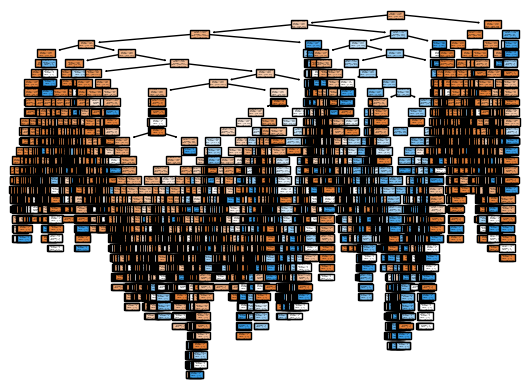

In [ ]:
def displayTree(classifier, X):
    # Graphic Representation
    cn = ['low_income', 'hi_income']
    tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn, filled=True)

    # Display Text
    text_representation = tree.export_text(classifier, feature_names=X.columns.values.tolist())
    print(text_representation)



# display text and graphic representation of a tree classifier
displayTree(cart_classifier, X)
displayTree(c5_classifier, X)

Function 3

[[2021  228]
 [ 291  420]]
-----------
[[2020  229]
 [ 299  412]]
-----------


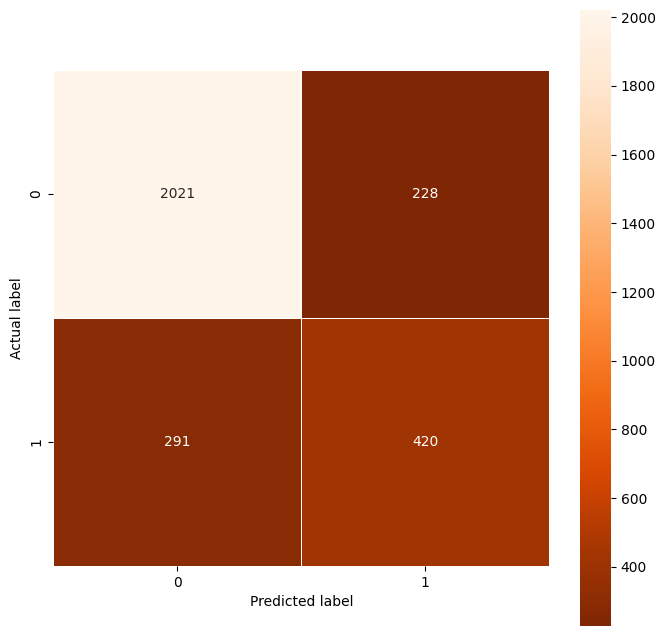

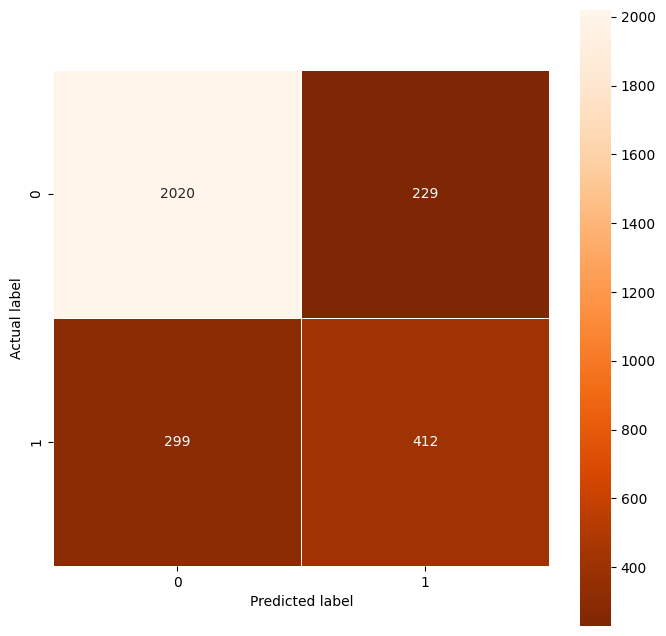

In [ ]:
def displayCM(classifier, X_train, y_train, X_test, y_test):
    # Record classifier's predictions
    classifier_predictions = classifier.predict(X_test)

    # Compute TP, TN, FP, FN values for CART
    classifier_cm = confusion_matrix(y_true=y_test, y_pred = classifier_predictions)


    # Print the classifier's confusion matrix
    print(classifier_cm)

    print("-----------")


    plt.figure(figsize=(8,8))
    sns.heatmap(classifier_cm, annot=True,
                linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# display text and heatmap of a confusion matrix
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)


Function 4

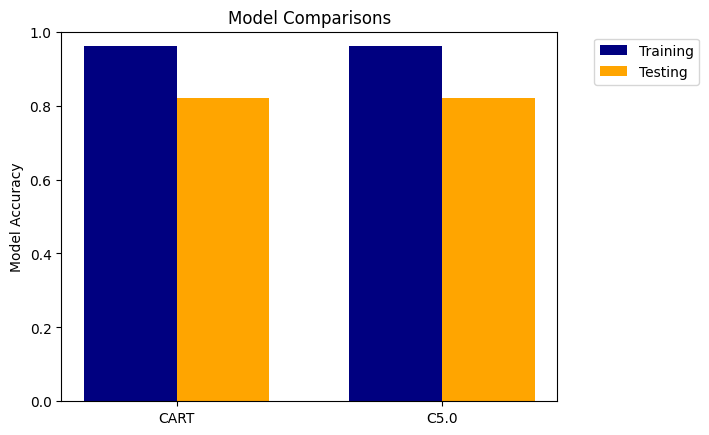

In [ ]:
def compareModels(model1, model2):
    # Model 1's classification accuracy on training and test datasets
    score1 = round(model1.score(X_train, y_train), 2)
    score2 = round(model1.score(X_test, y_test), 2)

    # Model 2's classification accuracy on training and test datasets
    score3 = round(model2.score(X_train, y_train), 2)
    score4 = round(model2.score(X_test, y_test), 2)

    labels = ['CART', 'C5.0']
    training_scores = [score1, score3]
    testing_scores =  [score2, score4]

    x = np.arange(2)  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
    rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Model Accuracy')
    ax.set_xticks(x)
    ax.set_ylim(0,1)
    ax.set_xticklabels(labels)
    ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

    plt.title('Model Comparisons')
    plt.show()



# create and display plots of side-by-side model comparisons
compareModels(cart_classifier, c5_classifier)

In [ ]:
# Assuming cart_classifier and c5_classifier were trained without depth or leaf node constraints
print("Depth of CART classifier:", cart_classifier.get_depth())
print("Depth of C5.0 classifier:", c5_classifier.get_depth())

Depth of CART classifier: 20
Depth of C5.0 classifier: 21


**Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plot the obtained accuracy values for various choices of max_depth (e.g. 2, 3, 4, none) and max_leaf_nodes (3, 4, 5, none).**

Max Depth = None and Max Leaf Nodes = None was represented in the original function example above.

**Max Depth (2,3,4)**

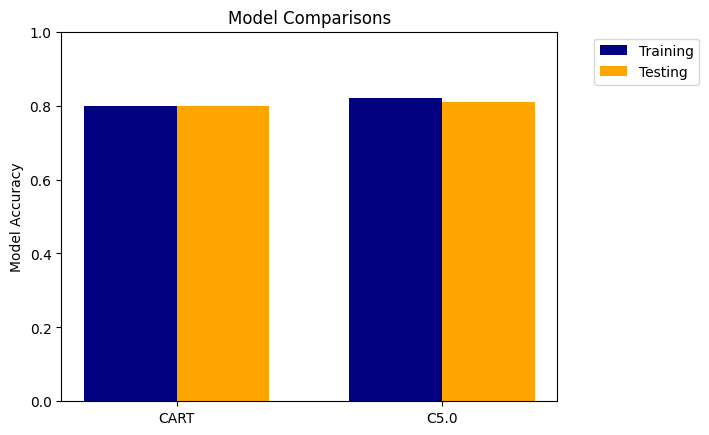

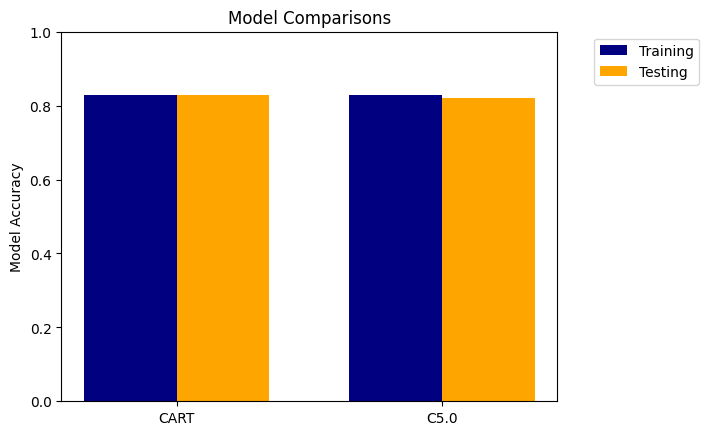

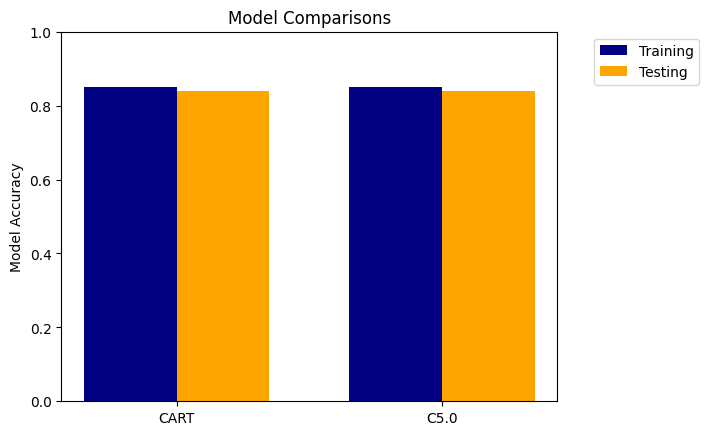

In [ ]:
#def makeDTModel(criterion, X_train, y_train, max_leaf_nodes=None, max_depth=None)

#Max Depth: 2
cart_classifier = makeDTModel("gini", X_train, y_train, max_depth=2)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_depth=2)
compareModels(cart_classifier, c5_classifier)

#Max Depth: 3
cart_classifier = makeDTModel("gini", X_train, y_train, max_depth=3)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_depth=3)
compareModels(cart_classifier, c5_classifier)

#Max Depth: 4
cart_classifier = makeDTModel("gini", X_train, y_train, max_depth=4)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_depth=4)
compareModels(cart_classifier, c5_classifier)

**Max Leaf Nodes**

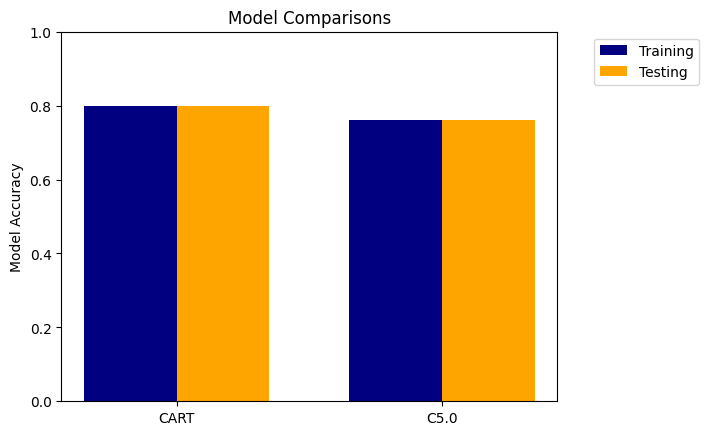

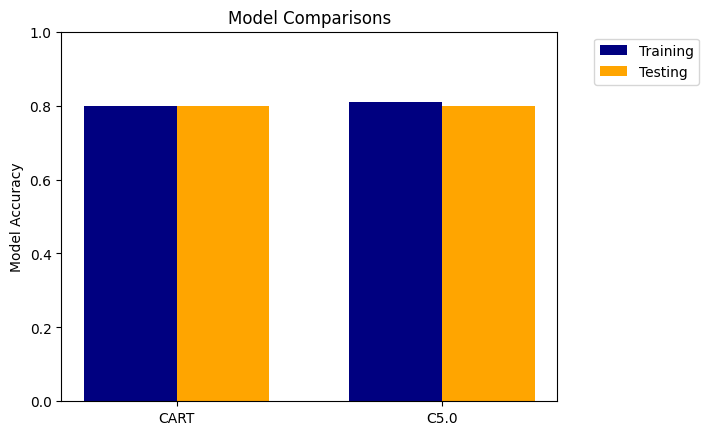

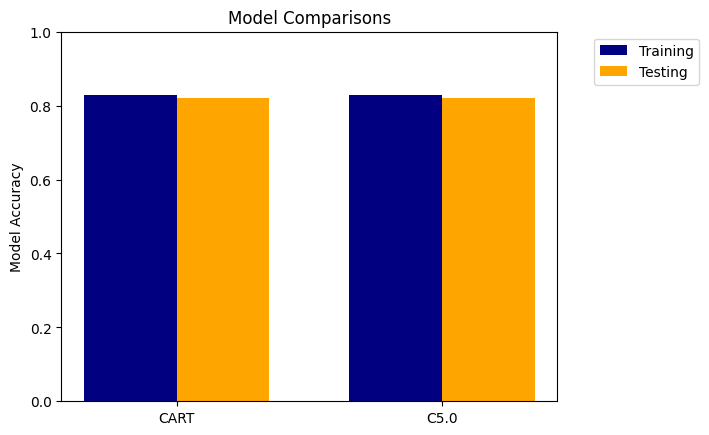

In [ ]:
#def makeDTModel(criterion, X_train, y_train, max_leaf_nodes=None, max_depth=None)

#Max Leaf Nodes: 2
cart_classifier = makeDTModel("gini", X_train, y_train, max_leaf_nodes=2)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_leaf_nodes=2)
compareModels(cart_classifier, c5_classifier)

#Max Leaf Nodes: 3
cart_classifier = makeDTModel("gini", X_train, y_train, max_leaf_nodes=3)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_leaf_nodes=3)
compareModels(cart_classifier, c5_classifier)

#Max Leaf Nodes: 4
cart_classifier = makeDTModel("gini", X_train, y_train, max_leaf_nodes=4)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_leaf_nodes=4)
compareModels(cart_classifier, c5_classifier)

**Summarize your findings**

##Dataset

This dataset has more rows for Income where the value is <= $ 50k. This may create a model that is better at predicting adults who have an income <=50k in comparison to adults who have an income >50k. This is noticeable when comparing the heat map of the confusion matrix. Although both income levels have around the same false positives and negatives, the model’s True Negatives look much higher than its True Positives due to less available data.  


##Max Depth

As Max Depth increases, the accuracy improves. With the improvement of accuracy, the testing data starts to decrease, showing that the model is less accurate when testing data it hasn't seen before, as both the training and testing data go up.
Cart testing accuracy decreases as the depth increases. C5.0 starts with a lower training accuracy at depth 2 but tends to keep the same distance with each added depth. Both perform at very similar accuracies while increasing depth.


##Max Leaf Node

When Max Leaf Node = 2, there is a decrease in accuracy for C5.0 when compared to CART. As the Leaf Nodes increases, the accuracy improves, but testing accuracy continues to decline. When Max Leaf Node = 4, both classifiers perform the same.

##Improved Model

For the original model, the training accuracy improved the most, at almost 100% accuracy. However, the testing is still very low in comparison, at around 80% which may represent that the model is overfitting. This could possibly be due to the lack of limits on max depth or max leaf nodes. By limiting and combining these factors, we find that the model below includes an increased training accuracy as well as an increased testing accuracy. This represents the model better than isolating max depth and leaf node separately or limiting them.



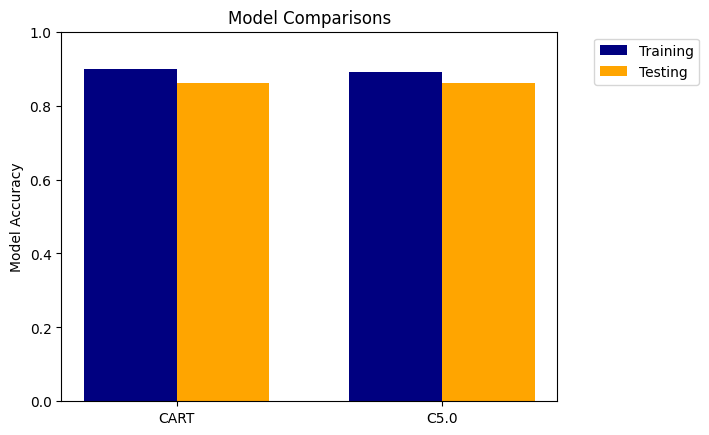

In [ ]:
cart_classifier = makeDTModel("gini", X_train, y_train, max_depth=400, max_leaf_nodes=300)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_depth=400, max_leaf_nodes=300)
compareModels(cart_classifier, c5_classifier)